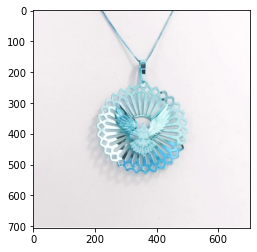

Imagem 1: <class 'numpy.ndarray'>
(706, 705, 3)


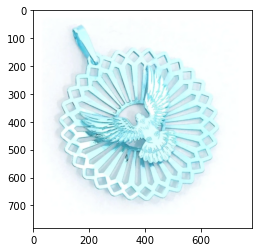

Imagem 2: <class 'numpy.ndarray'>
(781, 785, 3)


In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


# ler duas imagens
img1 = cv.imread('imagem1.jpg')
img2 = cv.imread('imagem2.jpg')

# [print das duas imagens]
plt.imshow(img1),plt.show() 
print('Imagem 1:', type(img1))
print(img1.shape)

plt.imshow(img2),plt.show()
print('Imagem 2:', type(img2))
print(img2.shape)

In [7]:
# converte para preto e branco
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
print(type(gray1))
print(gray1.shape)

gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
print(type(gray2))
print(gray2.shape)

<class 'numpy.ndarray'>
(706, 705)
<class 'numpy.ndarray'>
(781, 785)


<class 'numpy.ndarray'>
(706, 705, 3)
<class 'numpy.ndarray'>
(781, 785, 3)


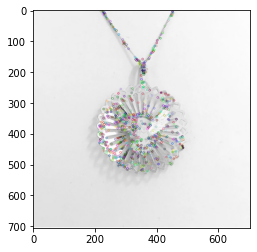

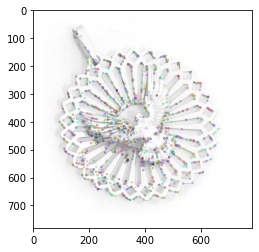

In [8]:
# dar o SIFT nelas
#keypoints img1
sift = cv.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(gray1,None)

# desenha os keypoints img1
img3 = cv.drawKeypoints(gray1,keypoints_1,img1)
print(type(img3))
print(img3.shape)

#keypoints img2
keypoints_2, descriptors_2 = sift.detectAndCompute(gray2,None)

# desenha os keypoints img2
img4 = cv.drawKeypoints(gray2,keypoints_2,img2)
print(type(img4))
print(img4.shape)

# Aqui ainda estou chamando os keypoints de uma imagem só por vez
plt.imshow(img3),plt.show()
plt.imshow(img4),plt.show()

# dar o Brute Force Matcher e os descriptors bf.Match(des1, des2)
bf = cv.BFMatcher (cv.NORM_L1, crossCheck = True)
matches = bf.match(descriptors_1, descriptors_2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

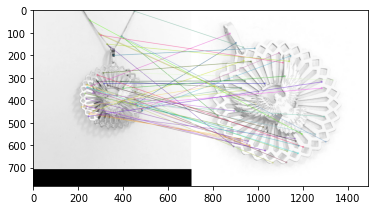

In [9]:
# desenha os primeiros 50 matches
img5 = cv.drawMatches(gray1, keypoints_1, gray2, keypoints_2, matches[:50], gray2, flags=2)
plt.imshow(img5),plt.show()

# coloca o array dos matches numa imagem e a salva
img5 = Image.fromarray(img5)
img5.save('img5.png', format = 'PNG')

# cria variáveis com uma das dimensões do tamanho do número de matches 
matches = matches[:int(len(matches)*90)]
no_of_matches = len(matches)
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

# Atribui o queryIdx dos kp1 dos matches da img1 à variável p1 e os trainIdx da img2 (à variável p2)
for i in range(len(matches)):
    p1[i, :] = keypoints_1[matches[i].queryIdx].pt
    p2[i, :] = keypoints_2[matches[i].trainIdx].pt

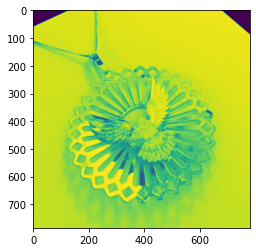

(<matplotlib.image.AxesImage at 0x23c3f3b9b20>, None)

In [10]:
# Cria máscara, homografia e imagem transformada por elas
homography, mask = cv.findHomography(p1, p2, cv.RANSAC)
transformed_img = cv.warpPerspective(gray1, homography, (781,785))
cv.imwrite('imagem_transformada_por_SIFT.jpg', transformed_img)
plt.imshow(transformed_img), plt.show()